In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
engine = create_engine('')

In [8]:
sql = '''
SELECT
  rp.IdRequerimiento,
  rp.IdEmpleado,
  rp.Completado,
  rp.FechaCompletado,
  rq.Descripcion,
  rq.FechaCreo,
  rs.Nombre AS Responsable
FROM OBTRequerimientoEmpleado AS rp
INNER JOIN OBTRequerimiento AS rq ON rq.IdRequerimiento = rp.IdRequerimiento
INNER JOIN OBTResponsable AS rs ON rs.IdResponsable = rq.IdResponsable
'''
df = pd.read_sql_query(sql, engine)
df.head()

,IdRequerimiento,IdEmpleado,Completado,FechaCompletado,Descripcion,FechaCreo,Responsable
0,6,3,1,2023-06-08 11:07:05,Botas industriales,2023-06-08 14:20:04,Juan Perez
1,7,3,1,2023-06-08 11:08:52,Set de herramientas,2023-06-08 14:20:19,Luis Perez
2,8,3,1,2023-06-08 11:08:56,Uniforme,2023-06-08 14:20:30,Ana Perez
3,9,3,1,2023-06-08 11:09:05,Multimetro,2023-06-08 14:20:43,Raul Perez
4,10,3,1,2023-06-08 11:09:09,Telefono,2023-06-08 14:20:54,Juan Perez


In [10]:
df_responsables = df.groupby(['Responsable'])['Completado'].sum().reset_index()
df_responsables.describe()

,Completado
count,4.00000
mean,1.50000
std,0.57735
min,1.00000
25%,1.00000
50%,1.50000
75%,2.00000
max,2.00000


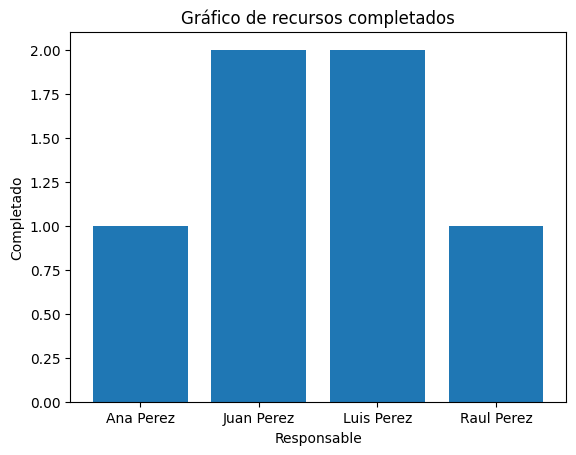

In [11]:
plt.bar(df_responsables['Responsable'], df_responsables['Completado'])

# Personalizar el gráfico
plt.xlabel('Responsable')
plt.ylabel('Completado')
plt.title('Gráfico de recursos completados')

# Mostrar el gráfico
plt.show()

         Tiempo
count  4.000000
mean   2.989201
std    0.416826
min    2.364028
25%    2.985590
50%    3.193333
75%    3.196944
max    3.206111


C:\Users\sajanel\AppData\Local\Temp\ipykernel_9984\3440887364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completado['Tiempo'] = (df_completado['FechaCreo'] - df_completado['FechaCompletado']).dt.total_seconds() / 3600


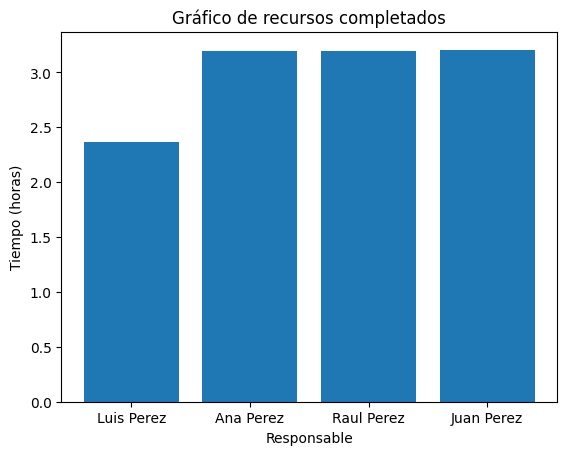

In [12]:
df_completado = df[df['Completado'] == 1]
df_completado['Tiempo'] = (df_completado['FechaCreo'] - df_completado['FechaCompletado']).dt.total_seconds() / 3600
df_tiempo = df_completado.groupby('Responsable')['Tiempo'].mean().reset_index().sort_values('Tiempo', ascending=True)
print(df_tiempo.describe())
plt.bar(df_tiempo['Responsable'], df_tiempo['Tiempo'])

# Personalizar el gráfico
plt.xlabel('Responsable')
plt.ylabel('Tiempo (horas)')
plt.title('Gráfico de recursos completados')

# Mostrar el gráfico
plt.show()